#计算物理第二次作业

$$1.(a)$$

In [14]:
#输出数据时用到了文件包“prettytable.py”
import numpy as np
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable
#定义朗格朗日函数，反回拉格朗日插值法法所得的值
def lagrange(s):
    t=21
    x=[]
    f=[]
    l=[]
    for i in range(t):
        x.append(-1+0.1*i)
        f.append(1/(1+25*x[i]**2))
    for j in range(t):
        q=1
        for m in range(t):
            if(m!=j):
                q=q*(s-x[m])/(x[j]-x[m])     
        l.append(q)
    sum=0
    for i in range(t):
        sum=sum+f[i]*l[i]
    return(sum)
t=21
x=[]
f=[]
l=[]
for i in range(t):
    x.append(-1+0.1*i)
    f.append(1/(1+25*x[i]**2))
p=[]
dp=[]
a=[-1+0.05*n for n in range(41)]  
b=[1/(1+25*a[i]**2) for i in range(41)]
for i in range(41):
    p.append(lagrange(a[i]))
    dp.append(abs(b[i]-lagrange(a[i])))
col = PrettyTable()
col.add_column("x",a)
col.add_column("f(x)",b)
col.add_column("P(x)",p)
col.add_column("|f(x)-P(x)|",dp)
print(col)

+----------------------+----------------------+----------------------+-----------------------+
|          x           |         f(x)         |         P(x)         |      |f(x)-P(x)|      |
+----------------------+----------------------+----------------------+-----------------------+
|         -1.0         | 0.038461538461538464 | 0.038461538461538464 |          0.0          |
|        -0.95         | 0.042440318302387266 |  -39.95244903304148  |   39.99488935134387   |
|         -0.9         | 0.047058823529411764 | 0.047058823529411764 |          0.0          |
|        -0.85         | 0.05245901639344263  |  3.4549577998641214  |   3.402498783470679   |
|         -0.8         | 0.05882352941176469  | 0.05882352941176469  |          0.0          |
|        -0.75         | 0.06639004149377593  | -0.4470519607088397  |   0.5134420022026156  |
|         -0.7         | 0.07547169811320756  | 0.07547169811320756  |          0.0          |
| -0.6499999999999999  | 0.08648648648648652  | 0.

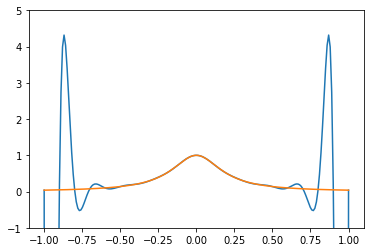

In [23]:
import numpy as np
import matplotlib.pyplot as plt
#定义朗格朗日函数，反回拉格朗日插值法法所得的值
def lagrange(s):
    t=21
    x=[]
    f=[]
    l=[]
    for i in range(t):
        x.append(-1+0.1*i)
        f.append(1/(1+25*x[i]**2))
    for j in range(t):
        q=1
        for m in range(t):
            if(m!=j):
                q=q*(s-x[m])/(x[j]-x[m])     
        l.append(q)
    sum=0
    for i in range(t):
        sum=sum+f[i]*l[i]
    return(sum)
x=np.linspace(-1,1,200)
#绘图
plt.plot(x,lagrange(x))
plt.ylim(-1,5)
plt.plot(x,1/(1+25*x**2))

$$1b$$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
#Runge函数
def f(x):
    return(1/(1+25*x**2))
#n阶第一类Chebyshev多项式
def T1(n,x):
    if(n==0):
        return(1)
    elif(n==1):
        return(x)
    else:
        return(2*x*T1(n-1,x)-T1(n-2,x))
#Chebyshev多项式的系数
def C1(m):
    sum=0
    for i in range(20):
        sum=sum+f(math.cos(math.pi*(i+1/2)/20))*math.cos(math.pi*m*(i+1/2)/20)
    return(sum/10)
#近似得到目标函数F
def F(x):
    sum=C1(0)/2
    for i in range(1,20):
        sum=sum+C1(i)*T1(i,x)
    return(sum)
c=[]
dc=[]
f1=[]
x=[]
a=[]
for i in range(21):
    a.append(math.cos(math.pi*(i+0.5)/20))
for i in range(20):
    b=(a[i]+a[i+1])/2
    x.append(a[i])
    x.append(b)
x.append(a[20])
for i in range(41):
    f1.append(f(x[i]))
    c.append(F(x[i]))
for i in range(41):
    dc.append(abs(f1[i]-c[i]))
col = PrettyTable()
col.add_column("x",x)
col.add_column("f(x)",f1)
col.add_column("c(x)",c)
col.add_column("|f(x)-c(x)|",dc)
print(col)

+-----------------------+----------------------+----------------------+------------------------+
|           x           |         f(x)         |         c(x)         |      |f(x)-c(x)|       |
+-----------------------+----------------------+----------------------+------------------------+
|   0.996917333733128   | 0.03869055042259115  | 0.03869055042259126  | 1.1102230246251565e-16 |
|   0.9846436270654022  | 0.03962267044383162  |  0.0410124239924959  | 0.0013897535486642743  |
|   0.9723699203976766  | 0.040588399387943605 | 0.04058839938794349  | 1.1796119636642288e-16 |
|   0.9481247264544816  | 0.04260120862978102  | 0.041027751076210955 | 0.0015734575535700651  |
|   0.9238795325112867  | 0.044765092294532106 | 0.044765092294532335 | 2.2898349882893854e-16 |
|   0.8882598484326896  | 0.04825058119056361  | 0.05005122950927825  |  0.00180064831871464   |
|   0.8526401643540923  | 0.05215156157328421  | 0.05215156157328353  | 6.800116025829084e-16  |
|   0.8065230649770616  | 0.05

忽略在函数值上由于机器精度导致的微小差别，同1a相比Chebyshev多项式的插值更稳定（由图像明显可以看出lagrange内插出现了明显的误差）

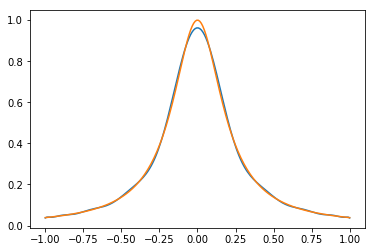

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
#Runge函数
def f(x):
    return(1/(1+25*x**2))
#n阶第一类Chebyshev多项式
def T1(n,x):
    if(n==0):
        return(1)
    elif(n==1):
        return(x)
    else:
        return(2*x*T1(n-1,x)-T1(n-2,x))
#Chebyshev多项式的系数
def C1(m):
    sum=0
    for i in range(20):
        sum=sum+f(math.cos(math.pi*(i+1/2)/20))*math.cos(math.pi*m*(i+1/2)/20)
    return(sum/10)
#近似得到目标函数F
def F(x):
    sum=C1(0)/2
    for i in range(1,20):
        sum=sum+C1(i)*T1(i,x)
    return(sum)
x=np.linspace(-1,1,200)
plt.plot(x,F(x))
plt.plot(x,f(x))

$$1c$$

In [31]:
import numpy
import math
from prettytable import PrettyTable
#求三次样条函数的矩(求解三对角矩阵)
def M1(a,b,c,d):#a、c参数是三对角矩阵的非对角元，b为对角元，AX=d
    n=len(b)
    q=[]
    p=[]
    x=[]
    for j in range(n-1):
        q.append(j)
    for k in range(n):
        p.append(k)
        x.append(k)
    q[0]=c[0]/b[0]
    p[0]=d[0]/b[0]
    for i in range(1,n-1):
        q[i]=c[i]/(b[i]-q[i-1]*a[i-1])
    for j in range(1,n):
        p[j]=(d[j]-p[j-1]*a[j-1])/(b[j]-q[j-1]*a[j-1])
    x[n-1]=p[n-1]
    for k in range(n-2,-1,-1):
        x[k]=p[k]-q[k]*x[k+1]
    return (x)#反回AX=d的解在一个列表中
def f(x):
    return(1/(1+25*x**2))
#取自然边界条件即m0=mn=0
N=21
b=[]
c=[]
a=[]
d=[]
y=[]
x=[]
h=[]
for i in range(N):
    x.append(-1+0.1*i)
    y.append(f(x[i]))
    b.append(i)
    d.append(i)
for j in range(N-1):
    h.append(x[j+1]-x[j])
    a.append(i)
    c.append(i)
#求求矩所需的三对角矩阵
a[N-2]=0
c[0]=0
b[0]=b[N-1]=1
d[0]=d[N-1]=0
for i in range(N-2):
    a[i]=h[i]/6
    c[i+1]=h[i+1]/6
for i in range(1,N-1):
    b[i]=(h[i-1]+h[i])/3
    d[i]=(y[i+1]-y[i])/h[i]-(y[i]-y[i-1])/h[i-1]
#矩
m=M1(a,b,c,d)
#定义三次样条函数
def s(g,j):
    Aj=(y[j+1]-y[j])/h[j]-h[j]*(m[j+1]-m[j])/6
    Bj=y[j]-m[j]*h[j]**2/6
    Sj=m[j]*(x[j+1]-g)**3/(6*h[j])+m[j+1]*(g-x[j])**3/(6*h[j])+Aj*(g-x[j])+Bj
    return(Sj)
three=[]
dthree=[]
f1=[]
l=[]
for i in range(41):
    l.append(-1+0.05*i)
for i in range(41):
    f1.append(f(l[i]))
    z=int((i-1)/2)
    three.append(s(l[i],z))
for i in range(41):
    dthree.append(abs(f1[i]-three[i]))
col = PrettyTable()
col.add_column("x",l)
col.add_column("f(x)",f1)
col.add_column("three(x)",three)
col.add_column("|f(x)-three(x)|",dthree)
print(col)

+----------------------+----------------------+----------------------+------------------------+
|          x           |         f(x)         |       three(x)       |    |f(x)-three(x)|     |
+----------------------+----------------------+----------------------+------------------------+
|         -1.0         | 0.038461538461538464 | 0.038461538461538464 |          0.0           |
|        -0.95         | 0.042440318302387266 | 0.04253421642828388  | 9.389812589661456e-05  |
|         -0.9         | 0.047058823529411764 | 0.047058823529411764 |          0.0           |
|        -0.85         | 0.05245901639344263  | 0.052431287366732096 | 2.7729026710533733e-05 |
|         -0.8         | 0.05882352941176469  | 0.05882352941176469  |          0.0           |
|        -0.75         | 0.06639004149377593  | 0.06639405338251333  | 4.011888737401326e-06  |
|         -0.7         | 0.07547169811320756  | 0.07547169811320756  |          0.0           |
| -0.6499999999999999  | 0.0864864864864

三次样条函数法在不考虑机器误差情况下函数值与真实值相差无异，另外该方法绘出的曲线光滑、与原函数图线十分逼近、较lagrange插值法更为稳定。

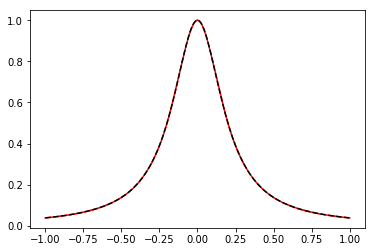

In [29]:
import numpy
import math
from prettytable import PrettyTable
#求三次样条函数的矩(求解三对角矩阵)
def M1(a,b,c,d):#a、c参数是三对角矩阵的非对角元，b为对角元，AX=d
    n=len(b)
    q=[]
    p=[]
    x=[]
    for j in range(n-1):
        q.append(j)
    for k in range(n):
        p.append(k)
        x.append(k)
    q[0]=c[0]/b[0]
    p[0]=d[0]/b[0]
    for i in range(1,n-1):
        q[i]=c[i]/(b[i]-q[i-1]*a[i-1])
    for j in range(1,n):
        p[j]=(d[j]-p[j-1]*a[j-1])/(b[j]-q[j-1]*a[j-1])
    x[n-1]=p[n-1]
    for k in range(n-2,-1,-1):
        x[k]=p[k]-q[k]*x[k+1]
    return (x)#反回AX=d的解在一个列表中
def f(x):
    return(1/(1+25*x**2))
#取自然边界条件即m0=mn=0
N=21
b=[]
c=[]
a=[]
d=[]
y=[]
x=[]
h=[]
for i in range(N):
    x.append(-1+0.1*i)
    y.append(f(x[i]))
    b.append(i)
    d.append(i)
for j in range(N-1):
    h.append(x[j+1]-x[j])
    a.append(i)
    c.append(i)
#求求矩所需的三对角矩阵
a[N-2]=0
c[0]=0
b[0]=b[N-1]=1
d[0]=d[N-1]=0
for i in range(N-2):
    a[i]=h[i]/6
    c[i+1]=h[i+1]/6
for i in range(1,N-1):
    b[i]=(h[i-1]+h[i])/3
    d[i]=(y[i+1]-y[i])/h[i]-(y[i]-y[i-1])/h[i-1]
#矩
m=M1(a,b,c,d)
#定义三次样条函数
def s(g,j):
    Aj=(y[j+1]-y[j])/h[j]-h[j]*(m[j+1]-m[j])/6
    Bj=y[j]-m[j]*h[j]**2/6
    Sj=m[j]*(x[j+1]-g)**3/(6*h[j])+m[j+1]*(g-x[j])**3/(6*h[j])+Aj*(g-x[j])+Bj
    return(Sj)
#画三次样条函数图
for i in range(N-1):
    g=np.linspace(-1+0.1*i,-1+0.1*(i+1),200)
    plt.plot(g,s(g,i),'r')#以红实线画出
q=np.linspace(-1,1,200)
plt.plot(q,f(q),'k--')#以黑虚线画出f

$$2a$$

In [11]:
import numpy
import math
from prettytable import PrettyTable
def Xt(t):
    r=(1-math.cos(math.pi*t/4))*math.cos(math.pi*t/4)
    return(r)
def Yt(t):
    r=(1-math.cos(math.pi*t/4))*math.sin(math.pi*t/4)
    return(r)
x=[n for n in range(9)]
xt=[Xt(n) for n in range(9)]
yt=[Yt(n) for n in range(9)]
col = PrettyTable()
col.add_column("t",x)
col.add_column("X(t)",xt)
col.add_column("Y(t)",yt)
print(col)

+---+-------------------------+------------------------+
| t |           X(t)          |          Y(t)          |
+---+-------------------------+------------------------+
| 0 |           0.0           |          0.0           |
| 1 |   0.20710678118654752   |  0.20710678118654752   |
| 2 |  6.123233995736765e-17  |   0.9999999999999999   |
| 3 |   -1.2071067811865475   |   1.2071067811865475   |
| 4 |           -2.0          | 2.4492935982947064e-16 |
| 5 |    -1.207106781186548   |  -1.2071067811865475   |
| 6 | -1.8369701987210302e-16 |  -1.0000000000000002   |
| 7 |    0.2071067811865476   |  -0.20710678118654768  |
| 8 |           0.0           |          -0.0          |
+---+-------------------------+------------------------+


$$2b$$

三次样条函数见2c

$$2c$$

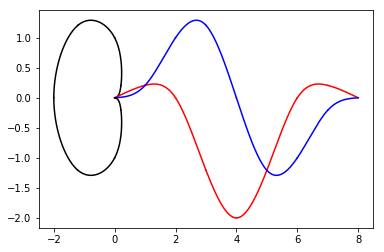

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
def Xt(t):
    r=(1-math.cos(math.pi*t/4))*math.cos(math.pi*t/4)
    return(r)
def Yt(t):
    r=(1-math.cos(math.pi*t/4))*math.sin(math.pi*t/4)
    return(r)
#求三次样条函数的矩(求解三对角矩阵)
def M1(a,b,c,d):#a、c参数是三对角矩阵的非对角元，b为对角元，AX=d
    n=len(b)
    q=[]
    p=[]
    x=[]
    for j in range(n-1):
        q.append(j)
    for k in range(n):
        p.append(k)
        x.append(k)
    q[0]=c[0]/b[0]
    p[0]=d[0]/b[0]
    for i in range(1,n-1):
        q[i]=c[i]/(b[i]-q[i-1]*a[i-1])
    for j in range(1,n):
        p[j]=(d[j]-p[j-1]*a[j-1])/(b[j]-q[j-1]*a[j-1])
    x[n-1]=p[n-1]
    for k in range(n-2,-1,-1):
        x[k]=p[k]-q[k]*x[k+1]
    return (x)
#给出函数f(t)，点的个数N，起始点p，步长q反回三次样条函数
def yt3(f,N,p,q,k,J):
    #取自然边界条件即m0=mn=0
    b=[]
    c=[]
    a=[]
    d=[]
    y=[]
    x=[]
    h=[]
    for i in range(N):
        x.append(p+q*i)
        y.append(f(x[i]))
    for j in range(N-1):
        h.append(x[j+1]-x[j])
    for i in range(N):
        b.append(i)
        d.append(i)
    for i in range(N-1):
        a.append(i)
        c.append(i)
    a[N-2]=0
    c[0]=0
    b[0]=b[N-1]=1
    d[0]=d[N-1]=0
    for i in range(N-2):
        a[i]=h[i]/6
        c[i+1]=h[i+1]/6
    for i in range(1,N-1):
        b[i]=(h[i-1]+h[i])/3
        d[i]=(y[i+1]-y[i])/h[i]-(y[i]-y[i-1])/h[i-1]
    #矩
    m=M1(a,b,c,d)
    #定义三次样条函数
    def s(g,j):
        Aj=(y[j+1]-y[j])/h[j]-h[j]*(m[j+1]-m[j])/6
        Bj=y[j]-m[j]*h[j]**2/6
        Sj=m[j]*(x[j+1]-g)**3/(6*h[j])+m[j+1]*(g-x[j])**3/(6*h[j])+Aj*(g-x[j])+Bj
        return(Sj)
    return(s(k,J))
#画出两个三次样条函数
for i in range(8):
    k=np.linspace(0+1*i,0+1*(i+1),200)
    plt.plot(yt3(Xt,9,0,1,k,i),yt3(Yt,9,0,1,k,i),'k')
    plt.plot(k,yt3(Xt,9,0,1,k,i),'r')
    plt.plot(k,yt3(Yt,9,0,1,k,i),'b')

$$2d$$

由算法可知三次样条函数在每一个节点x处都有f(x+0)=f(x-0);f'(x+0)=f'(x-0)这就保证了曲线的光滑连接。

$$3a$$